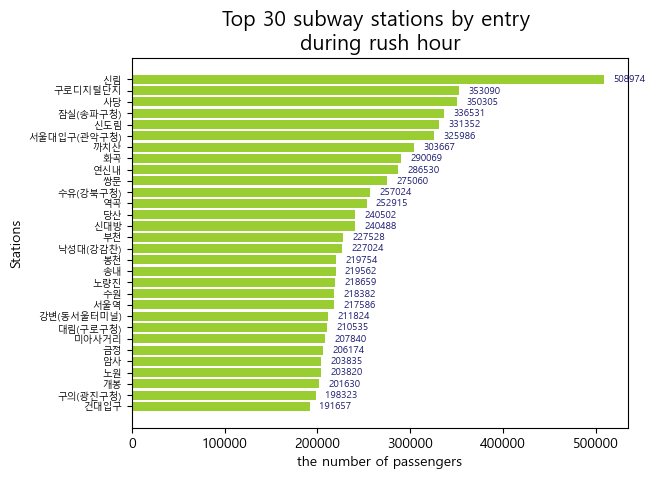

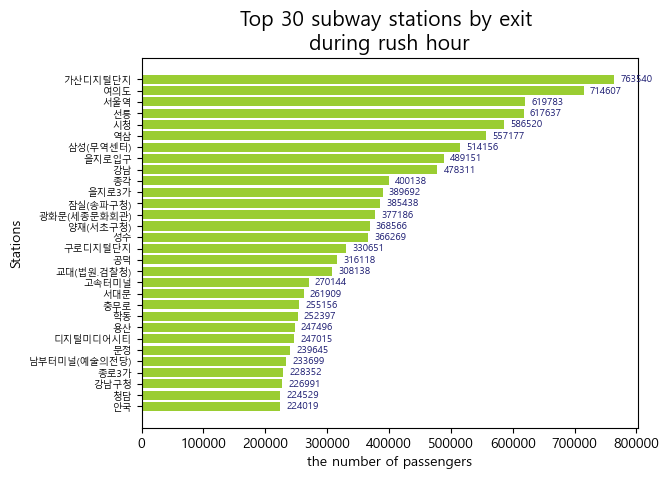

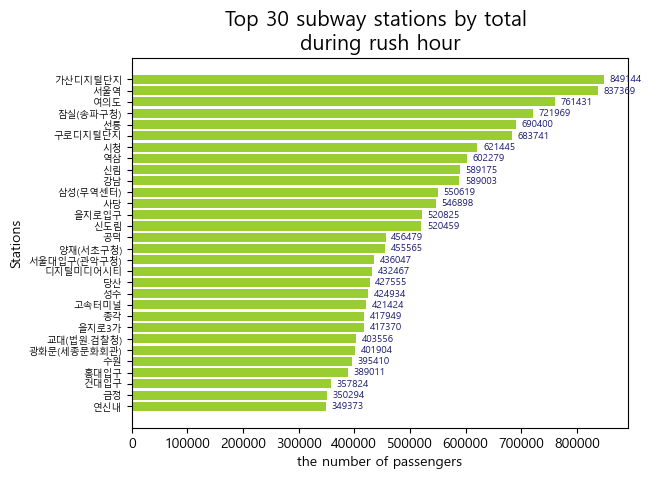

In [43]:
import csv
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


def find_stations(filename, find, title):
    f = open(filename, 'r', encoding='ANSI')
    data = csv.reader(f)
    header = next(data)
    
    stations = {}
    
    for row in data:
        if(stations.get(row[3])==None):
            if find == '승차':
                stations[row[3]] = int(row[4])+int(row[6])
            elif find == '하차' :
                stations[row[3]] = int(row[5])+int(row[7])
            elif find == '승하차':
                stations[row[3]]= int(row[4])+int(row[5])+int(row[6])+int(row[7])
        else:
            orig = stations.get(row[3])
            if find == '승차':
                stations[row[3]] = orig + int(row[4])+int(row[6])
            elif find == '하차' :
                stations[row[3]] = orig + int(row[5])+int(row[7])
            elif find == '승하차':
                stations[row[3]]= orig + int(row[4])+int(row[5])+int(row[6])+int(row[7])
    
    f.close()
    
    nums = list(stations.values())
    nums.sort(reverse=True)
    
    stations_30=[]
    rstations = {v:k for k,v in stations.items()}
    for i in range(30) :
        stations_30.append(rstations.get(nums[i]))
    
    # 폰트 경로 설정
    font_path = 'C:/Windows/Fonts/malgun.ttf'
    # 폰트 이름 가져오기
    font_name = fm.FontProperties(fname=font_path).get_name()
    # 폰트 설정
    plt.rc('font', family=font_name)
    
    plt.title(title, fontsize=15)
    plt.barh(range(30), nums[:30], tick_label=stations_30, color='yellowgreen')
    plt.tick_params(axis='y', labelsize=7)
    plt.ylabel('Stations')
    plt.xlabel('the number of passengers')
    
     # 각 막대에 레이블 추가
    for i, v in enumerate(nums[:30]):
        plt.text(v+10000, i, str(v), color='midnightblue', fontsize=7, va='center')
    
    plt.gca().invert_yaxis() #y축 방향 뒤집기
    plt.show()


def main():
    titles=['Top 30 subway stations by entry \nduring rush hour', 'Top 30 subway stations by exit \nduring rush hour', 'Top 30 subway stations by total \nduring rush hour']
    find_stations('subway03.csv', '승차', titles[0])
    find_stations('subway03.csv', '하차', titles[1])
    find_stations('subway03.csv', '승하차', titles[2])

if __name__ == '__main__':
    main()